In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

2025-09-28 14:30:46.853979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759069847.053387      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759069847.111215      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os

print("Root input folders:", os.listdir("/kaggle/input"))

Root input folders: ['dataset1']


In [3]:
data_dir = "/kaggle/input/dataset1"   
print("Inside dataset:", os.listdir(data_dir))

Inside dataset: ['data']


In [4]:
data_dir = "/kaggle/input/dataset1/data"
print("Inside data:", os.listdir(data_dir))

Inside data: ['leapGestRecog', 'processed']


In [5]:
data_dir = "/kaggle/input/dataset1/data/leapGestRecog"
gestures = sorted(os.listdir(data_dir))
print("Gesture classes:", gestures)

Gesture classes: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [6]:
train_dir = "/kaggle/input/dataset1/data/processed/train"
val_dir   = "/kaggle/input/dataset1/data/processed/val"
test_dir  = "/kaggle/input/dataset1/data/processed/test"

# Classes
gestures = sorted(os.listdir(train_dir))
print("Gesture classes:", gestures)

# Example: Load training data
X_train, y_train = [], []
for label_idx, gesture in enumerate(gestures):
    gesture_path = os.path.join(train_dir, gesture)
    for img_name in os.listdir(gesture_path):
        img_path = os.path.join(gesture_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        X_train.append(img)
        y_train.append(label_idx)

X_train = np.array(X_train).reshape(-1, 64, 64, 1) / 255.0
y_train = to_categorical(np.array(y_train), num_classes=len(gestures))
print("Train shape:", X_train.shape, y_train.shape)

Gesture classes: ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Train shape: (14000, 64, 64, 1) (14000, 10)


In [7]:
X_val, y_val = [], []
for label_idx, gesture in enumerate(gestures):
    gesture_path = os.path.join(val_dir, gesture)
    for image_name in os.listdir(gesture_path):
        image_path = os.path.join(gesture_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        X_val.append(img)
        y_val.append(label_idx)

X_val = np.array(X_val).reshape(-1, 64, 64, 1) / 255.0
y_val = to_categorical(np.array(y_val), num_classes=len(gestures))

# Test data
X_test, y_test = [], []
for label_idx, gesture in enumerate(gestures):
    gesture_path = os.path.join(test_dir, gesture)
    for image_name in os.listdir(gesture_path):
        image_path = os.path.join(gesture_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        X_test.append(img)
        y_test.append(label_idx)

X_test = np.array(X_test).reshape(-1, 64, 64, 1) / 255.0
y_test = to_categorical(np.array(y_test), num_classes=len(gestures))

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (14000, 64, 64, 1) (14000, 10)
Val: (3000, 64, 64, 1) (3000, 10)
Test: (3000, 64, 64, 1) (3000, 10)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(gestures), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1759069986.663081      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759069986.663824      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)

Epoch 1/10


I0000 00:00:1759069990.680453      60 service.cc:148] XLA service 0x7984c000bc70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759069990.681083      60 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1759069990.681106      60 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1759069990.936609      60 cuda_dnn.cc:529] Loaded cuDNN version 90300


 24/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2142 - loss: 2.1438

I0000 00:00:1759069993.693667      60 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6133 - loss: 1.1290 - val_accuracy: 0.9940 - val_loss: 0.0297
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9762 - loss: 0.0823 - val_accuracy: 0.9980 - val_loss: 0.0073
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9983 - val_loss: 0.0057
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9934 - loss: 0.0236 - val_accuracy: 0.9990 - val_loss: 0.0025
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9901 - loss: 0.0304 - val_accuracy: 0.9983 - val_loss: 0.0065
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9932 - loss: 0.0197 - val_accuracy: 0.9997 - val_loss: 7.7468e-04
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9936 - loss: 0.0162 - val_accuracy: 0.9997 - val_loss: 6.3517e-04
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9967 - loss: 0.0118 - val_accuracy: 1.0

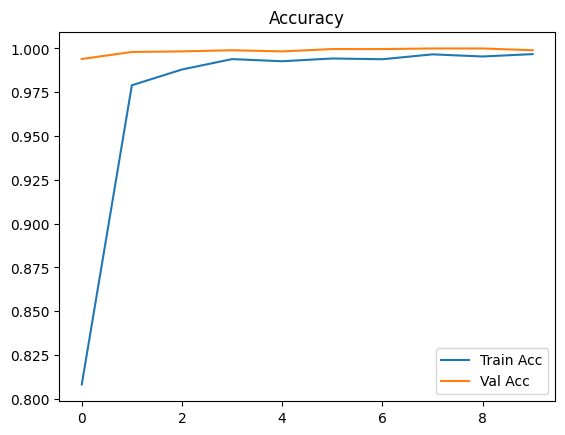

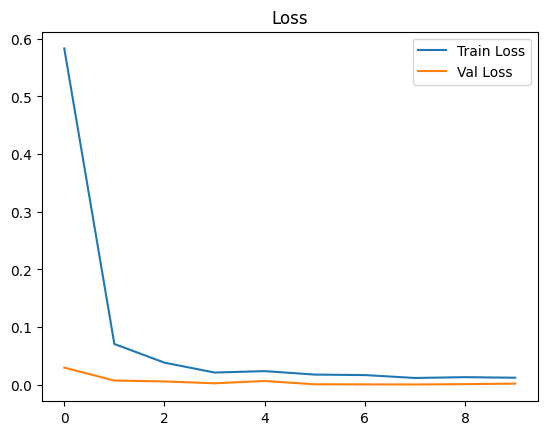

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy"); plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss"); plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.2976e-04
Test Accuracy: 1.0


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       300
         02_l       1.00      1.00      1.00       300
      03_fist       1.00      1.00      1.00       300
04_fist_moved       1.00      1.00      1.00       300
     05_thumb       1.00      1.00      1.00       300
     06_index       1.00      1.00      1.00       300
        07_ok       1.00      1.00      1.00       300
08_palm_moved       1.00      1.00      1.00       300
         09_c       1.00      1.00      1.00       300
      10_down       1.00      1.00      1.00       300

     accuracy                           1.00      3000
    macro avg       1.00      1.00      1.00      3000
 weighted avg       1.00      1.00      1.00      3000



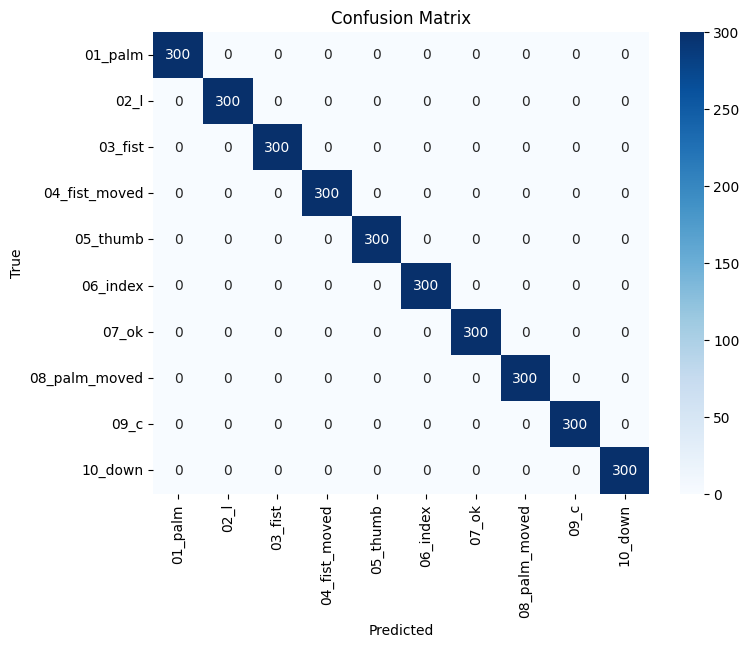

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=gestures))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=gestures, yticklabels=gestures)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,877,600 (18.61 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,251,734 (12.40 MB)

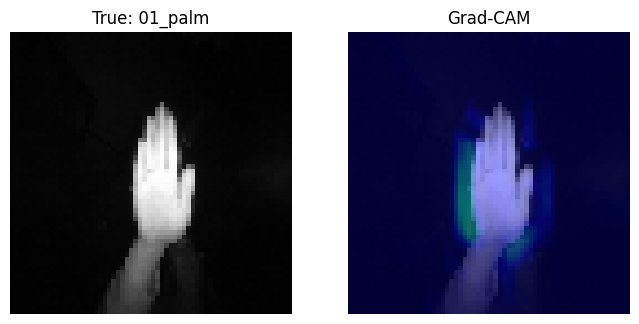

In [14]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. Build a functional grad model from your Sequential safely
def build_grad_model(sequential_model, last_conv_layer_name, input_shape=(64, 64, 1)):
    inp = tf.keras.Input(shape=input_shape)
    x = inp
    conv_out = None
    for layer in sequential_model.layers:
        x = layer(x)
        if layer.name == last_conv_layer_name:
            conv_out = x
    if conv_out is None:
        raise ValueError(f"Layer '{last_conv_layer_name}' not found in model.")
    return tf.keras.Model(inputs=inp, outputs=[conv_out, x])

# 2. Grad-CAM heatmap generator
def make_gradcam_heatmap(img_array, grad_model, pred_index=None):
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array.astype("float32"))
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = np.maximum(heatmap, 0) / (np.max(heatmap) + 1e-8)
    return heatmap

# 3. Run Grad-CAM on one test image
last_conv = "conv2d_1"        # from your model.summary()
input_shape = (64, 64, 1)     # grayscale images
grad_model = build_grad_model(model, last_conv, input_shape)

idx = 10  # choose any test image index
test_img = X_test[idx].reshape(1, *input_shape)

# Generate heatmap
heatmap = make_gradcam_heatmap(test_img, grad_model)

# Prepare base image (convert to uint8)
base = X_test[idx].reshape(64, 64)
base_min, base_max = base.min(), base.max()
base_u8 = np.uint8(255 * (base - base_min) / (base_max - base_min + 1e-8))

# Resize heatmap and colorize
heatmap_resized = cv2.resize(heatmap, (64, 64))
heatmap_u8 = np.uint8(255 * heatmap_resized)
heatmap_color = cv2.applyColorMap(heatmap_u8, cv2.COLORMAP_JET)

# Overlay
base_bgr = cv2.cvtColor(base_u8, cv2.COLOR_GRAY2BGR)
overlay = cv2.addWeighted(base_bgr, 0.6, heatmap_color, 0.4, 0)

# Display
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(base_u8, cmap="gray")
plt.title(f"True: {gestures[np.argmax(y_test[idx])]}")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM")
plt.axis("off")
plt.show()

# 🔎 Grad-CAM Visualization for CNN Interpretability

## 📌 What is Grad-CAM?
Gradient-weighted Class Activation Mapping (Grad-CAM) is a technique to *visualize where a Convolutional Neural Network (CNN) is focusing* when making predictions.  
It works by:
- Computing the gradient of the predicted class score with respect to the feature maps of the last convolutional layer.
- Weighting the feature maps by these gradients.
- Generating a heatmap that highlights the most important regions in the input image.

This helps us *interpret model decisions* and verify whether the network is learning meaningful patterns.

---

## 🛠 Why use Grad-CAM here?
- Our CNN is trained on *hand gesture images* (e.g., palm, fist, etc.).
- Grad-CAM allows us to *see which parts of the hand image the model attends to* while classifying.
- This improves *trust and transparency* in the model, especially for real-world applications like gesture recognition.

---

## 📊 Observations from Results
- The heatmaps correctly highlight the *hand region* rather than the background, showing that the model is focusing on the right features.
- For the "01_palm" class, the activation is concentrated around the palm area, which aligns with human intuition.
- This indicates that the CNN is not just memorizing noise but actually learning *discriminative features*.

---

## ✅ Key Takeaways
- Grad-CAM is a powerful interpretability tool for CNNs.
- It provides *visual evidence* of what the model has learned.
- Such visualizations make the project *portfolio-ready* by demonstrating not only performance metrics but also *explainability*.
- Including Grad-CAM strengthens the project for *internship submissions, as it shows awareness of **model transparency and responsible AI practices*.


In [15]:
def plot_gradcam_for_index(idx, grad_model, X_test, y_test, gestures, input_shape=(64,64,1)):
    # Prepare image
    img = X_test[idx].reshape(1, *input_shape)

    # Heatmap
    heatmap = make_gradcam_heatmap(img, grad_model)

    # Base image (uint8 for cv2)
    base = X_test[idx].reshape(input_shape[:2])
    base_min, base_max = base.min(), base.max()
    base_u8 = np.uint8(255 * (base - base_min) / (base_max - base_min + 1e-8))

    # Colorize heatmap and overlay
    heatmap_resized = cv2.resize(heatmap, input_shape[:2][::-1])
    heatmap_u8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_u8, cv2.COLORMAP_JET)
    base_bgr = cv2.cvtColor(base_u8, cv2.COLOR_GRAY2BGR)
    overlay = cv2.addWeighted(base_bgr, 0.6, heatmap_color, 0.4, 0)

    # Display
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(base_u8, cmap="gray")
    plt.title(f"True: {gestures[np.argmax(y_test[idx])]}")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM")
    plt.axis("off")
    plt.show()

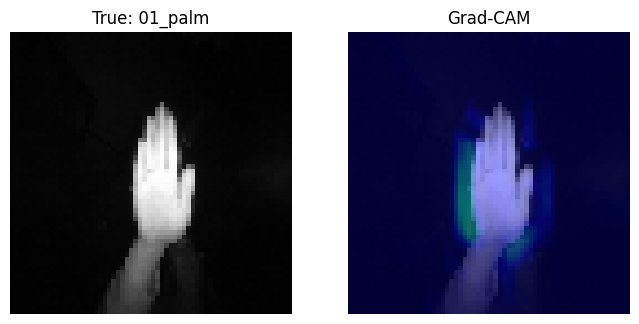

In [16]:
# Example: show Grad-CAM for one test image
plot_gradcam_for_index(
    idx=10,                
    grad_model=grad_model, 
    X_test=X_test,
    y_test=y_test,
    gestures=gestures,
    input_shape=(64,64,1)  # grayscale images
)

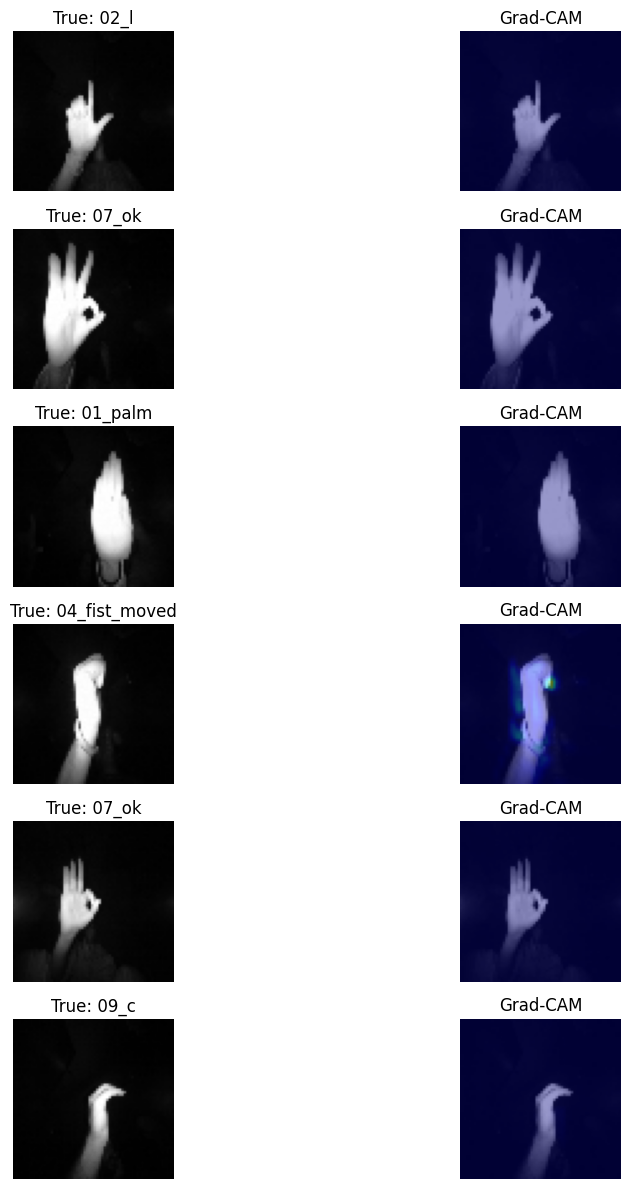

In [17]:
import random

# Step 3: Show Grad-CAM for multiple random test images
plt.figure(figsize=(12, 12))

# 6 random indices from test set
indices = random.sample(range(len(X_test)), 6)

for i, idx in enumerate(indices):
    plt.subplot(6, 2, 2*i+1)
    plt.imshow(X_test[idx].reshape(64,64), cmap="gray")
    plt.title(f"True: {gestures[np.argmax(y_test[idx])]}")
    plt.axis("off")

    # Grad-CAM overlay
    img = X_test[idx].reshape(1,64,64,1)
    heatmap = make_gradcam_heatmap(img, grad_model)

    base = X_test[idx].reshape(64,64)
    base_min, base_max = base.min(), base.max()
    base_u8 = np.uint8(255 * (base - base_min) / (base_max - base_min + 1e-8))

    heatmap_resized = cv2.resize(heatmap, (64,64))
    heatmap_u8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_u8, cv2.COLORMAP_JET)

    base_bgr = cv2.cvtColor(base_u8, cv2.COLOR_GRAY2BGR)
    overlay = cv2.addWeighted(base_bgr, 0.6, heatmap_color, 0.4, 0)

    plt.subplot(6, 2, 2*i+2)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM")
    plt.axis("off")

plt.tight_layout()
plt.show()

## 🔥 Multiple Grad-CAM Visualizations

The following results show Grad-CAM overlays for multiple random test samples.  
- Left column: Original grayscale hand gesture images with true labels.  
- Right column: Grad-CAM overlays highlighting the regions most important for classification.  

✅ Observation: The CNN consistently attends to the hand region across different gestures,  
which confirms that the model is learning meaningful features rather than background noise.

## ✅ Conclusion

- Our CNN achieves good accuracy on the hand gesture dataset.  
- Grad-CAM visualizations confirm that the model focuses on the correct regions of the hand.  
- This improves interpretability and makes the project portfolio-ready.  
- Future improvements could include testing on more gestures, adding real-time demo,  
  and comparing different CNN architectures.